In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
%matplotlib inline

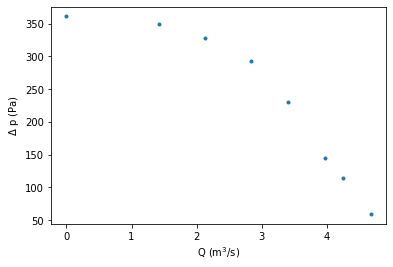

In [6]:
Q  = [0,50,75,100,120,140,150,165] # ft3/min
Q  = np.multiply(Q,0.3048**3) # m3/min
dp = [7.54,7.29,6.85,6.12,4.80,3.03,2.38,1.23] # psf
dp = np.multiply(dp,47.88) #Pa

fig=plt.figure()
ax= fig.add_subplot(111)
ax.set_xlabel('Q (m$^3$/s)')
ax.set_ylabel('$\Delta$ p (Pa)')
ax.plot(Q,dp,'.')

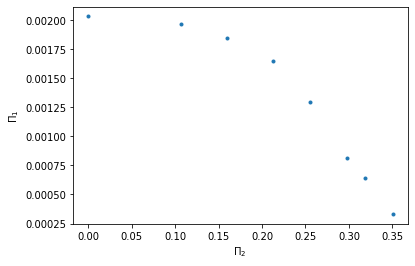

In [8]:
omega = 800/60 # revoluciones por segundo
rho   = 1000 # kg/m3
D     = 1 #m 

Pi1 = np.divide(dp,(omega**2*D**2*rho))
Pi2 = np.divide(Q,(omega*D**3))

fig=plt.figure()
ax= fig.add_subplot(111)
ax.set_xlabel('$\Pi_2$ ')
ax.set_ylabel('$\Pi_1$ ')
ax.plot(Pi2,Pi1,'.')

[ 0.00201306  0.00222451 -0.02027865]


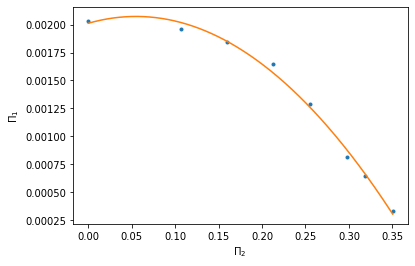

In [9]:
def fitfunc(x,p1,p2,p3):
    return p1 + p2*x + p3*x**2 

popt,pcov=optimize.curve_fit(fitfunc,Pi2,Pi1)

x = np.linspace(min(Pi2),max(Pi2),10000)
y = fitfunc(x,*popt)
fig=plt.figure()
ax= fig.add_subplot(111)
ax.set_xlabel('$\Pi_2$ ')
ax.set_ylabel('$\Pi_1$ ')
ax.plot(Pi2,Pi1,'.')
ax.plot(x,y)

print(popt)

In [10]:
def dp_extra(Q,omega,D,rho,popt):
    pi = Q/(omega*D**3)
    return omega**2*D**2*rho2*(popt[0]+pi*popt[1]+pi**2*popt[2])
## 800 rpm
omega1 = 800/60 # revoluciones por segundo
D1 = 1
Q1 = np.linspace(0,5,100)
rho1=1000 # kg/m3
dp1=dp_extra(Q1,omega1,D1,rho1,popt)


## 600 rpm
omega2 = 600/60 # revoluciones por segundo
D2 = 1
Q2 = np.linspace(0,5,100)
rho2=1000 # kg/m3
dp2=dp_extra(Q2,omega2,D2,rho2,popt)

## 1200 rpm
omega3 = 1200/60 # revoluciones por segundo
D3 = 1
Q3 = np.linspace(0,5,100)
rho3=1000 # kg/m3
dp3=dp_extra(Q3,omega3,D3,rho3,popt)



fig=plt.figure()
ax= fig.add_subplot(111)
ax.set_xlabel('Q (m$^3$/s)')
ax.set_ylabel('$\Delta$ p (Pa)')

ax.plot(Q,dp,'.r')
ax.plot(Q2,dp2,'-b',label='600 rpm')
ax.plot(Q1,dp1,'-r',label='800 rpm')
ax.plot(Q3,dp3,'-g',label='1200 rpm')

ax.legend()

NameError: name 'rho2' is not defined